In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading and describing data

In [6]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DL Project/train.csv')
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [7]:
test= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DL Project/test.csv')
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


# part 2

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical


In [9]:
def encode(train, test):
    label_encoder = LabelEncoder().fit(train.species) # fit labels(species) into numerical values
    labels = label_encoder.transform(train.species) # transfroming them into numerical values
    classes = list(label_encoder.classes_) # contains the unique classes in species column

    train = train.drop(['species', 'id'], axis=1) # dropping the labels from and image ids from the training data
    test_ids=test.id
    test = test.drop('id', axis=1) # dropping image ids from test data

    return train, labels, test, classes,test_ids


train, labels, test, classes,test_ids = encode(train, test)

In [10]:
# scalling the data with the z score
scaler = StandardScaler().fit(train.values)
scaled_train = scaler.transform(train.values)
# splitting the data but ennsuring that the class distrubtion of the labels are the constant
sss = StratifiedShuffleSplit(test_size=0.2, random_state=23)
# assigning the indices of the train and validation data
for train_index, valid_index in sss.split(scaled_train, labels):
    X_train, X_valid = scaled_train[train_index], scaled_train[valid_index]
    y_train, y_valid = labels[train_index], labels[valid_index]


In [11]:
nb_features = 64 # number of features per features type (shape, texture, margin)
nb_class = len(classes) # getting the number of unique classes
# reshape train data from 2d to 3d to fit the model
X_train_r = np.zeros((len(X_train), nb_features, 3)) # 3d numpy array with dimensions of parameters
X_train_r[:, :, 0] = X_train[:, :nb_features] # assigning shape to the first channel
X_train_r[:, :, 1] = X_train[:, nb_features:128] # assigning texture to the second channel
X_train_r[:, :, 2] = X_train[:, 128:] # assigning margin to the last channel

# reshape validation data
X_valid_r = np.zeros((len(X_valid), nb_features, 3))
X_valid_r[:, :, 0] = X_valid[:, :nb_features]
X_valid_r[:, :, 1] = X_valid[:, nb_features:128]
X_valid_r[:, :, 2] = X_valid[:, 128:]

In [12]:
y_train = to_categorical(y_train, nb_class)
y_valid = to_categorical(y_valid, nb_class)
nb_epoch = 15

In [23]:

# Define a list of optimizers and learning rates to try
optimizers = [SGD, Adam, RMSprop]
learning_rates = [0.001, 0.01, 0.1]

for optimizer_class in optimizers:
    for learning_rate in learning_rates:
        # Create the optimizer instance
        optimizer = optimizer_class(learning_rate=learning_rate)

        # Build and compile the model
        model = Sequential()
        model.add(Convolution1D(512, 1, input_shape=(nb_features, 3)))
        model.add(Activation('relu'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(2048, activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(nb_class, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train the model
        model.fit(X_train_r, y_train, epochs=nb_epoch, validation_data=(X_valid_r, y_valid), batch_size=64)

        # Evaluate the model
        evaluation = model.evaluate(X_valid_r, y_valid, verbose=0)
        accuracy = evaluation[1]

        print(f'Optimizer: {optimizer_class.__name__}, Learning Rate: {learning_rate}, Validation Accuracy: {accuracy * 100:.2f}%')


Epoch 1/15
13/13 [==============================] - 22s 2s/step - loss: 4.6067 - accuracy: 0.0063 - val_loss: 4.6014 - val_accuracy: 0.0152
Epoch 2/15
13/13 [==============================] - 20s 1s/step - loss: 4.6031 - accuracy: 0.0126 - val_loss: 4.5960 - val_accuracy: 0.0152
Epoch 3/15
13/13 [==============================] - 15s 1s/step - loss: 4.5941 - accuracy: 0.0177 - val_loss: 4.5905 - val_accuracy: 0.0152
Epoch 4/15
13/13 [==============================] - 15s 1s/step - loss: 4.5894 - accuracy: 0.0189 - val_loss: 4.5852 - val_accuracy: 0.0152
Epoch 5/15
13/13 [==============================] - 18s 1s/step - loss: 4.5845 - accuracy: 0.0215 - val_loss: 4.5799 - val_accuracy: 0.0152
Epoch 6/15
13/13 [==============================] - 16s 1s/step - loss: 4.5772 - accuracy: 0.0177 - val_loss: 4.5747 - val_accuracy: 0.0253
Epoch 7/15
13/13 [==============================] - 20s 2s/step - loss: 4.5743 - accuracy: 0.0139 - val_loss: 4.5695 - val_accuracy: 0.0253
Epoch 8/15
13/13 [==

In [11]:
model = Sequential()
model.add(Convolution1D(512, 1, input_shape=(nb_features, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(nb_class, activation='softmax'))


In [12]:

sgd = SGD(learning_rate=0.01, nesterov=True, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [13]:
# Assuming X_train_r and X_valid_r are your training and validation data
model.fit(X_train_r, y_train, epochs=nb_epoch, validation_data=(X_valid_r, y_valid), batch_size=64)

Epoch 1/15
13/13 [==============================] - 28s 2s/step - loss: 4.5246 - accuracy: 0.0543 - val_loss: 4.2942 - val_accuracy: 0.2980
Epoch 2/15
13/13 [==============================] - 22s 2s/step - loss: 4.0802 - accuracy: 0.2967 - val_loss: 3.6091 - val_accuracy: 0.4596
Epoch 3/15
13/13 [==============================] - 26s 2s/step - loss: 3.1181 - accuracy: 0.5619 - val_loss: 2.1746 - val_accuracy: 0.7576
Epoch 4/15
13/13 [==============================] - 24s 2s/step - loss: 1.4693 - accuracy: 0.8472 - val_loss: 0.7365 - val_accuracy: 0.8889
Epoch 5/15
13/13 [==============================] - 23s 2s/step - loss: 0.4067 - accuracy: 0.9470 - val_loss: 0.2497 - val_accuracy: 0.9798
Epoch 6/15
13/13 [==============================] - 26s 2s/step - loss: 0.1489 - accuracy: 0.9798 - val_loss: 0.2096 - val_accuracy: 0.9545
Epoch 7/15
13/13 [==============================] - 22s 2s/step - loss: 0.1005 - accuracy: 0.9861 - val_loss: 0.1218 - val_accuracy: 0.9798
Epoch 8/15
13/13 [==

In [20]:
# tuning adam with different batch sizes
optimizer = Adam(learning_rate=0.001)

best_model = Sequential()
best_model.add(Convolution1D(512, 1, input_shape=(nb_features, 3)))
best_model.add(Activation('relu'))
best_model.add(Flatten())
best_model.add(Dropout(0.4))
best_model.add(Dense(2048, activation='relu'))
best_model.add(Dense(1024, activation='relu'))
best_model.add(Dense(nb_class, activation='softmax'))

best_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with the current batch size
best_model.fit(X_train_r, y_train, epochs=nb_epoch, validation_data=(X_valid_r, y_valid), batch_size=32)

# Evaluate the model
evaluation = best_model.evaluate(X_valid_r, y_valid, verbose=0)
accuracy = evaluation[1]
print(f'Batch Size: {32}, Validation Accuracy: {accuracy * 100:.2f}%')


Epoch 1/15
25/25 [==============================] - 42s 2s/step - loss: 3.2477 - accuracy: 0.3662 - val_loss: 1.1003 - val_accuracy: 0.7273
Epoch 2/15
25/25 [==============================] - 41s 2s/step - loss: 0.5188 - accuracy: 0.8788 - val_loss: 0.5943 - val_accuracy: 0.8535
Epoch 3/15
25/25 [==============================] - 40s 2s/step - loss: 0.2476 - accuracy: 0.9381 - val_loss: 0.2010 - val_accuracy: 0.9545
Epoch 4/15
25/25 [==============================] - 42s 2s/step - loss: 0.0583 - accuracy: 0.9874 - val_loss: 0.1065 - val_accuracy: 0.9646
Epoch 5/15
25/25 [==============================] - 39s 2s/step - loss: 0.0393 - accuracy: 0.9937 - val_loss: 0.2575 - val_accuracy: 0.9394
Epoch 6/15
25/25 [==============================] - 43s 2s/step - loss: 0.0425 - accuracy: 0.9924 - val_loss: 0.1145 - val_accuracy: 0.9646
Epoch 7/15
25/25 [==============================] - 43s 2s/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0550 - val_accuracy: 0.9848
Epoch 8/15
25/25 [==

In [21]:
best_model.save('model.h5')
best_model.save_weights('model-weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
scaler = StandardScaler().fit(test.values)
scaled_test = scaler.transform(test.values)

In [23]:
test_dataset = np.zeros((len(scaled_test), nb_features, 3))
test_dataset[:, :, 0] = scaled_test[:, :nb_features]
test_dataset[:, :, 1] = scaled_test[:, nb_features:128]
test_dataset[:, :, 2] = scaled_test[:, 128:]

In [24]:
preds_test = best_model.predict(test_dataset)
preds_test

19/19 [==============================] - 3s 128ms/step


array([[6.29572270e-08, 9.27303176e-07, 2.94246814e-11, ...,
        7.80022802e-09, 9.17741716e-07, 8.68282086e-08],
       [3.46198092e-08, 7.44975495e-08, 1.57151902e-07, ...,
        2.04599814e-06, 1.60488656e-09, 4.77554522e-07],
       [6.94620983e-09, 9.99670863e-01, 4.58709841e-11, ...,
        1.05751824e-10, 3.52248342e-10, 4.68155895e-06],
       ...,
       [6.99989258e-08, 1.26810917e-07, 7.99961042e-10, ...,
        1.17515930e-09, 6.45039577e-09, 1.16469828e-07],
       [1.23316149e-10, 1.06381903e-09, 2.36864958e-06, ...,
        1.04182718e-09, 1.13895707e-11, 2.85817325e-09],
       [1.28978106e-10, 6.13536733e-09, 1.56060711e-08, ...,
        9.68338369e-08, 1.07057119e-08, 5.69028735e-08]], dtype=float32)

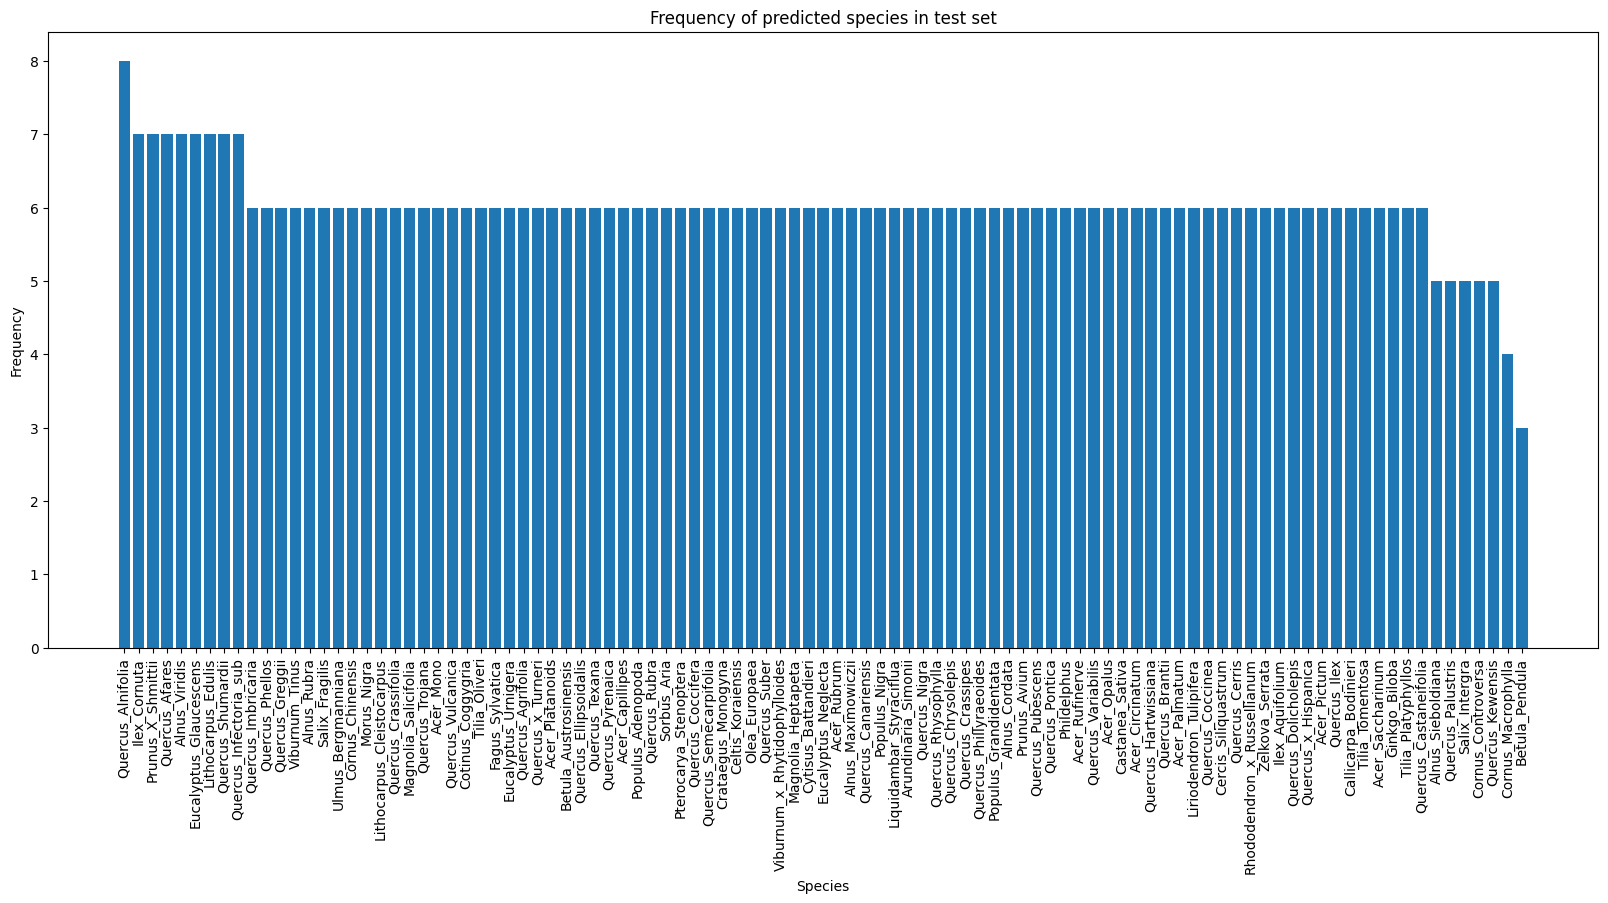

In [25]:
# Convert the predicted labels back to species names
predicted_species = [classes[np.argmax(pred)] for pred in preds_test]

# Create a dataframe with the species frequencies
species_freq = pd.DataFrame({'species': predicted_species})
species_freq = species_freq['species'].value_counts().reset_index()

# Plot a bar graph of the species frequencies
plt.figure(figsize=(20, 8))  # Increase the figure size
plt.bar(species_freq['index'], species_freq['species'], width=0.8)  # Adjust width as needed
plt.title('Frequency of predicted species in test set')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

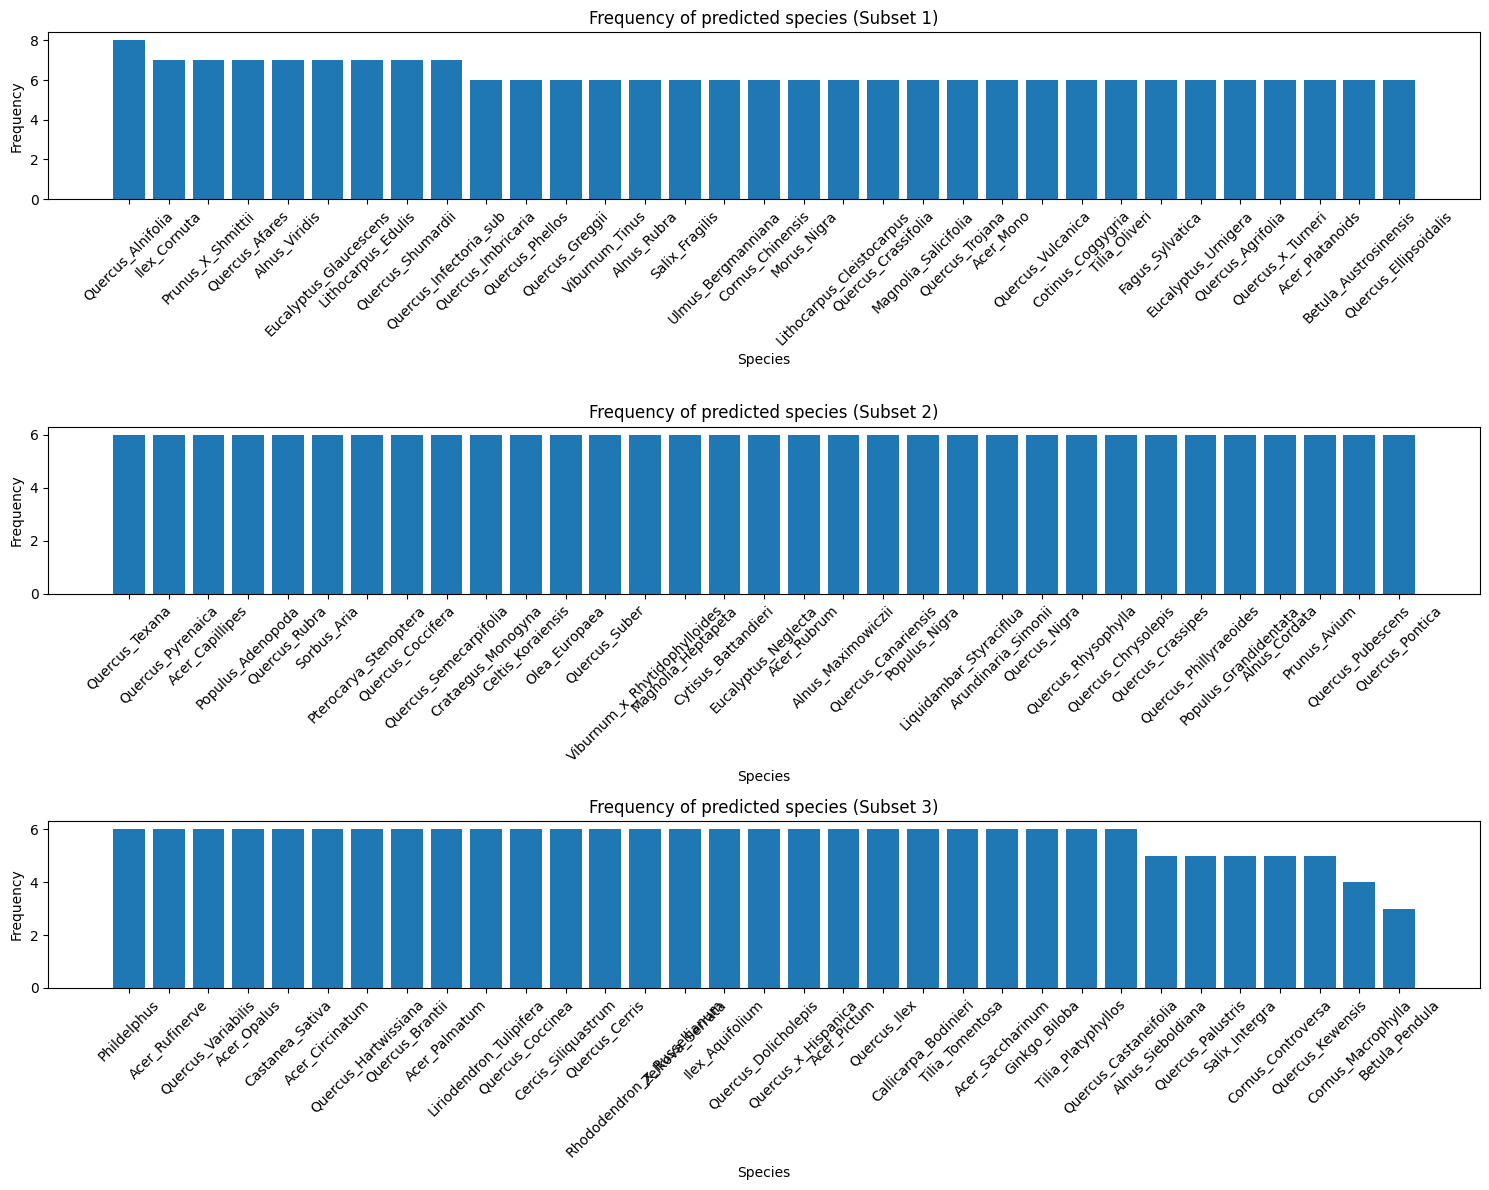

In [26]:
# Split the data into three subplots
num_subplots = 3
num_species_per_subplot = len(classes) // num_subplots

fig, axs = plt.subplots(num_subplots, figsize=(15, 12))

for i in range(num_subplots):
    start_idx = i * num_species_per_subplot
    end_idx = (i + 1) * num_species_per_subplot
    subset_species_freq = species_freq.iloc[start_idx:end_idx]

    axs[i].bar(subset_species_freq['index'], subset_species_freq['species'])
    axs[i].set_title(f'Frequency of predicted species (Subset {i + 1})')
    axs[i].set_xlabel('Species')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on validation set
pred_valid = best_model.predict(X_valid_r)
# Convert predictions to labels
pred_valid_labels = np.argmax(pred_valid, axis=1)
# Convert validation set labels to labels
valid_labels = np.argmax(y_valid, axis=1)

# Generate confusion matrix
print(classification_report(valid_labels,pred_valid_labels))

7/7 [==============================] - 2s 282ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00     